![dance party](dance_party.jpg)

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

## 🎯 Objective
The goal of this analysis is to create a dance-themed playlist for the company's summer party using data-driven insights. The playlist will be curated based on the 'danceability' feature of the songs, which is availsble in the Spotify dataset.  The analysis will involve the following steps:  
- Exploratory Data Analysis: Use descriptive statistics and data visualization techniques to understand the distribution of ‘danceability’ and its relationship with other audio features in the dataset. And I found that we need the songs to have the following criteria: 
    1. Danceability more than 0.626 where we have the upper 40 % of the data 
    2. popularity more than 50 where we have the upper 25% of the data
    3. Energy more than 0.68 where we have 50% of the data
    4. Valence more than 0.549 where we have the upper 40% of the data
    and these columns where chosen as they are significant in affecting the people's vibes 
- Predictive Modeling: Develop a machine learning model that predicts a song’s ‘danceability’ or will the song meet the criteria and classification we set or not based on its other features. This will involve preparing the data, selecting a model, training the model, and evaluating its performance. 
- Playlist Creation: Apply the predictive model to the Spotify dataset to score each song by its predicted ‘danceability’. The top 50 songs according to these scores will be selected for the dance party playlist.  
The ultimate goal is to leverage data analysis and machine learning techniques to make informed decisions about song selection, ensuring that the playlist sets the right mood for a fun and energetic summer party.

## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

In [20]:
pip install mplcyberpunk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Data Preparation

## Importing Necessary Packages
In this step, we import all the necessary packages that we will need for our data analysis. This typically includes packages like pandas for data manipulation, matplotlib and seaborn for data visualization, sklearn for machine learning, and so on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
from sklearn.preprocessing import LabelEncoder, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings("ignore")
from matplotlib import cm
plt.style.use("cyberpunk")


In [2]:
def columnVSfeaturesHist(columnName:str):
    q1 = spotify[columnName].quantile(0.25)
    q2 = spotify[columnName].quantile(0.75)
    max_limit = q2 + (1.5 * (q2-q1))
    print("Upper whisker point",max_limit)
    colormap_sect = np.linspace(0, 1, 12)
    colors = [cm.spring(x) for x in colormap_sect]
    figure, (axis) = plt.subplots(2, 2,figsize=(10,10),constrained_layout = True)
    figure.suptitle(columnName.capitalize(),size=20,color="#08e4ec")
    for column,ax,color in zip(['popularity','danceability','energy','valence'],axis.ravel(),colors):
        sns.kdeplot(spotify[spotify[columnName]>max_limit][column],ax=ax)
        ax.set_title(f"\n{column.upper()}",size=16,color=color)
        mplcyberpunk.add_gradient_fill(ax,alpha_gradientglow=0.5)
        mplcyberpunk.make_lines_glow(ax,n_glow_lines=20)
        print("The ",column,"Skewness is ",spotify[column].skew())

## Data Overview 
in these two step we load data and display the first 5 rows to take a peek look of the data, after loading the data we want to get basic information about our dataset. This includes the number of entries, the number of non-null entries for each column, and the data type of each column.

In [3]:
spotify = pd.read_csv('data/spotify.csv')
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

## Data Quality
In these two cells, we will assess the quality of the data by counting the number of missing values in each feature. This step is crucial in determining how to handle the missing values during the data preprocessing phase. Additionally, the presence of duplicates in our dataset can introduce bias and affect our analysis. Therefore, it is important to thoroughly check for and address any duplicates in the data.


**And we found that there were 444 row that are Duplicated. and one null in the columns [artists,album_name,track_name]and these nulls were in the same row**

In [5]:
spotify.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
spotify[spotify["artists"].isnull()==True]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65326,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0.0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [7]:
spotify.dropna(inplace=True)
print("There are",spotify.duplicated().sum(),"row "+"\033[1m"+"Completely Duplicated"+"\033[1m"+"")
spotify.drop_duplicates(inplace=True)

There are 444 row Completely Duplicated


## Unit Conversion
Upon inspecting the duration column, We can observe that the unit of measurement is in milliseconds, which is not ideal for our analysis. Therefore, we need to convert the unit of the duration column from milliseconds to minutes.

In [8]:
spotify['duration_min']= spotify.duration_ms/(10**3)/60
spotify.drop(['duration_ms'],inplace=True,axis=1)

# Exploratory Data Analysis

## Data Summary
In this cell, we will print the summary statistics of the dataframe. This will help us to see the mean, standard deviation, minimum, maximum, and quartiles of each numeric feature, as for the strings we see the the unique, top and frequency  for each non numeric feature.

In [9]:
spotify.describe(include="all")

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
count,112582,112582,112582,112582,112582.000000,112582,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582,112582.000000
unique,88894,31267,46325,72935,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114,NaN
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rock,NaN
freq,9,275,195,151,NaN,102945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NaN
mean,NaN,NaN,NaN,NaN,33.359605,NaN,0.568268,0.643641,5.312563,-8.203879,0.637624,0.084313,0.311711,0.154416,0.213335,0.475419,122.295702,3.929163,NaN,3.804137
std,NaN,NaN,NaN,NaN,22.301040,NaN,0.172818,0.249948,3.561017,4.965336,0.480689,0.104337,0.330503,0.307993,0.190106,0.258960,29.956014,0.339499,NaN,1.768431
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.143100
25%,NaN,NaN,NaN,NaN,17.000000,NaN,0.458000,0.476000,2.000000,-9.953000,0.000000,0.035900,0.016600,0.000000,0.097900,0.261000,99.635750,4.000000,NaN,2.908333
50%,NaN,NaN,NaN,NaN,35.000000,NaN,0.581000,0.686000,5.000000,-6.975000,1.000000,0.048900,0.166000,0.000041,0.132000,0.465000,122.050000,4.000000,NaN,3.552000
75%,NaN,NaN,NaN,NaN,50.000000,NaN,0.695000,0.854000,8.000000,-4.992000,1.000000,0.084500,0.589000,0.046400,0.273000,0.684000,140.100500,4.000000,NaN,4.360667


## Feature Correlation 
In this cell, we will visualize the correlation between each pair of features using a heatmap. This will help us to see the realtion between the features

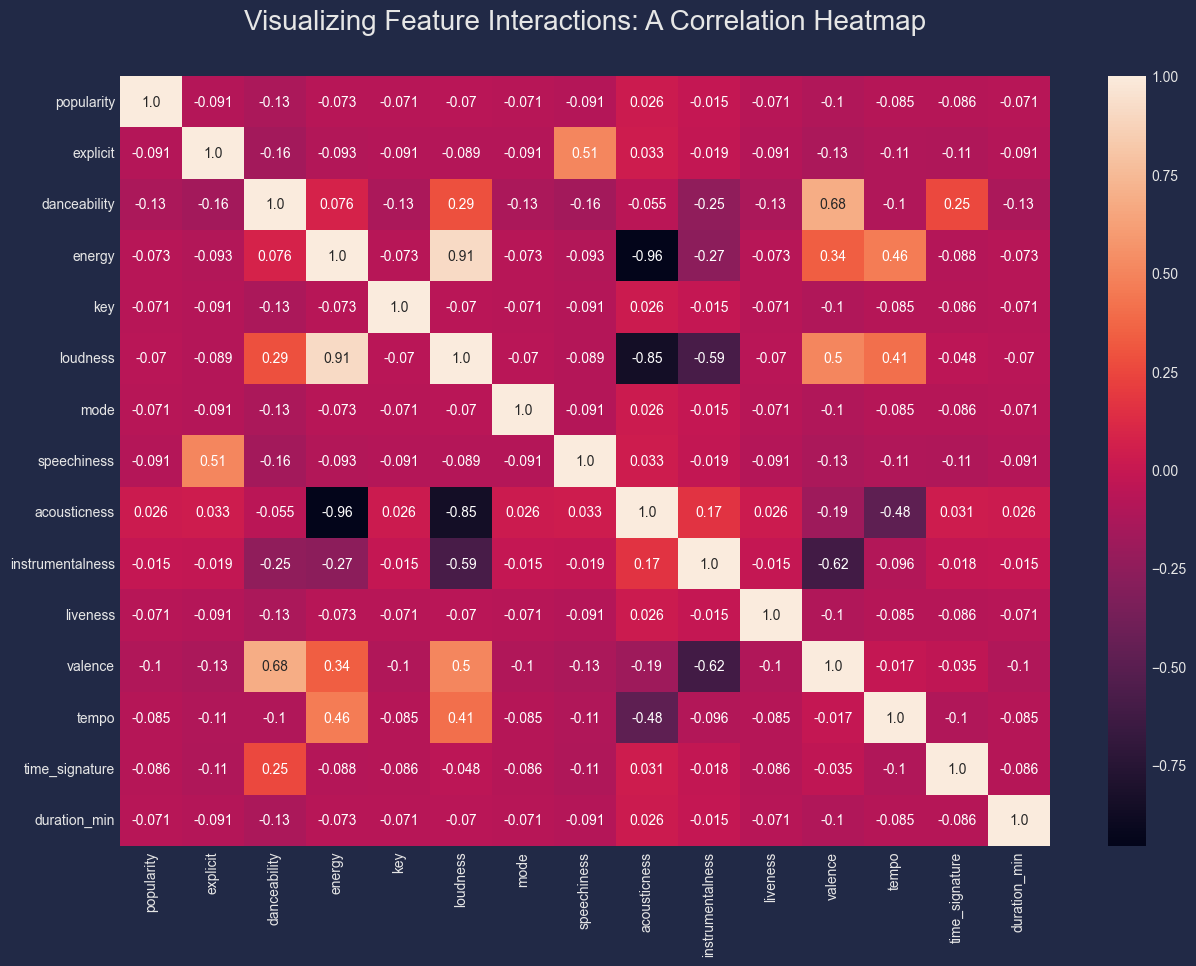

In [10]:
correlation=spotify.corr()
correlation=correlation[(correlation>0.2) | (correlation<-0.2)].fillna(0)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation.corr(),annot=True,fmt=".2")
plt.title("Visualizing Feature Interactions: A Correlation Heatmap", fontsize=20,y=1.05)
plt.show()

## Feature Distribution 
The feature distribution is a histogram of the values for each feature. The following plot shows that most features have a normal distribution, with some skewed.

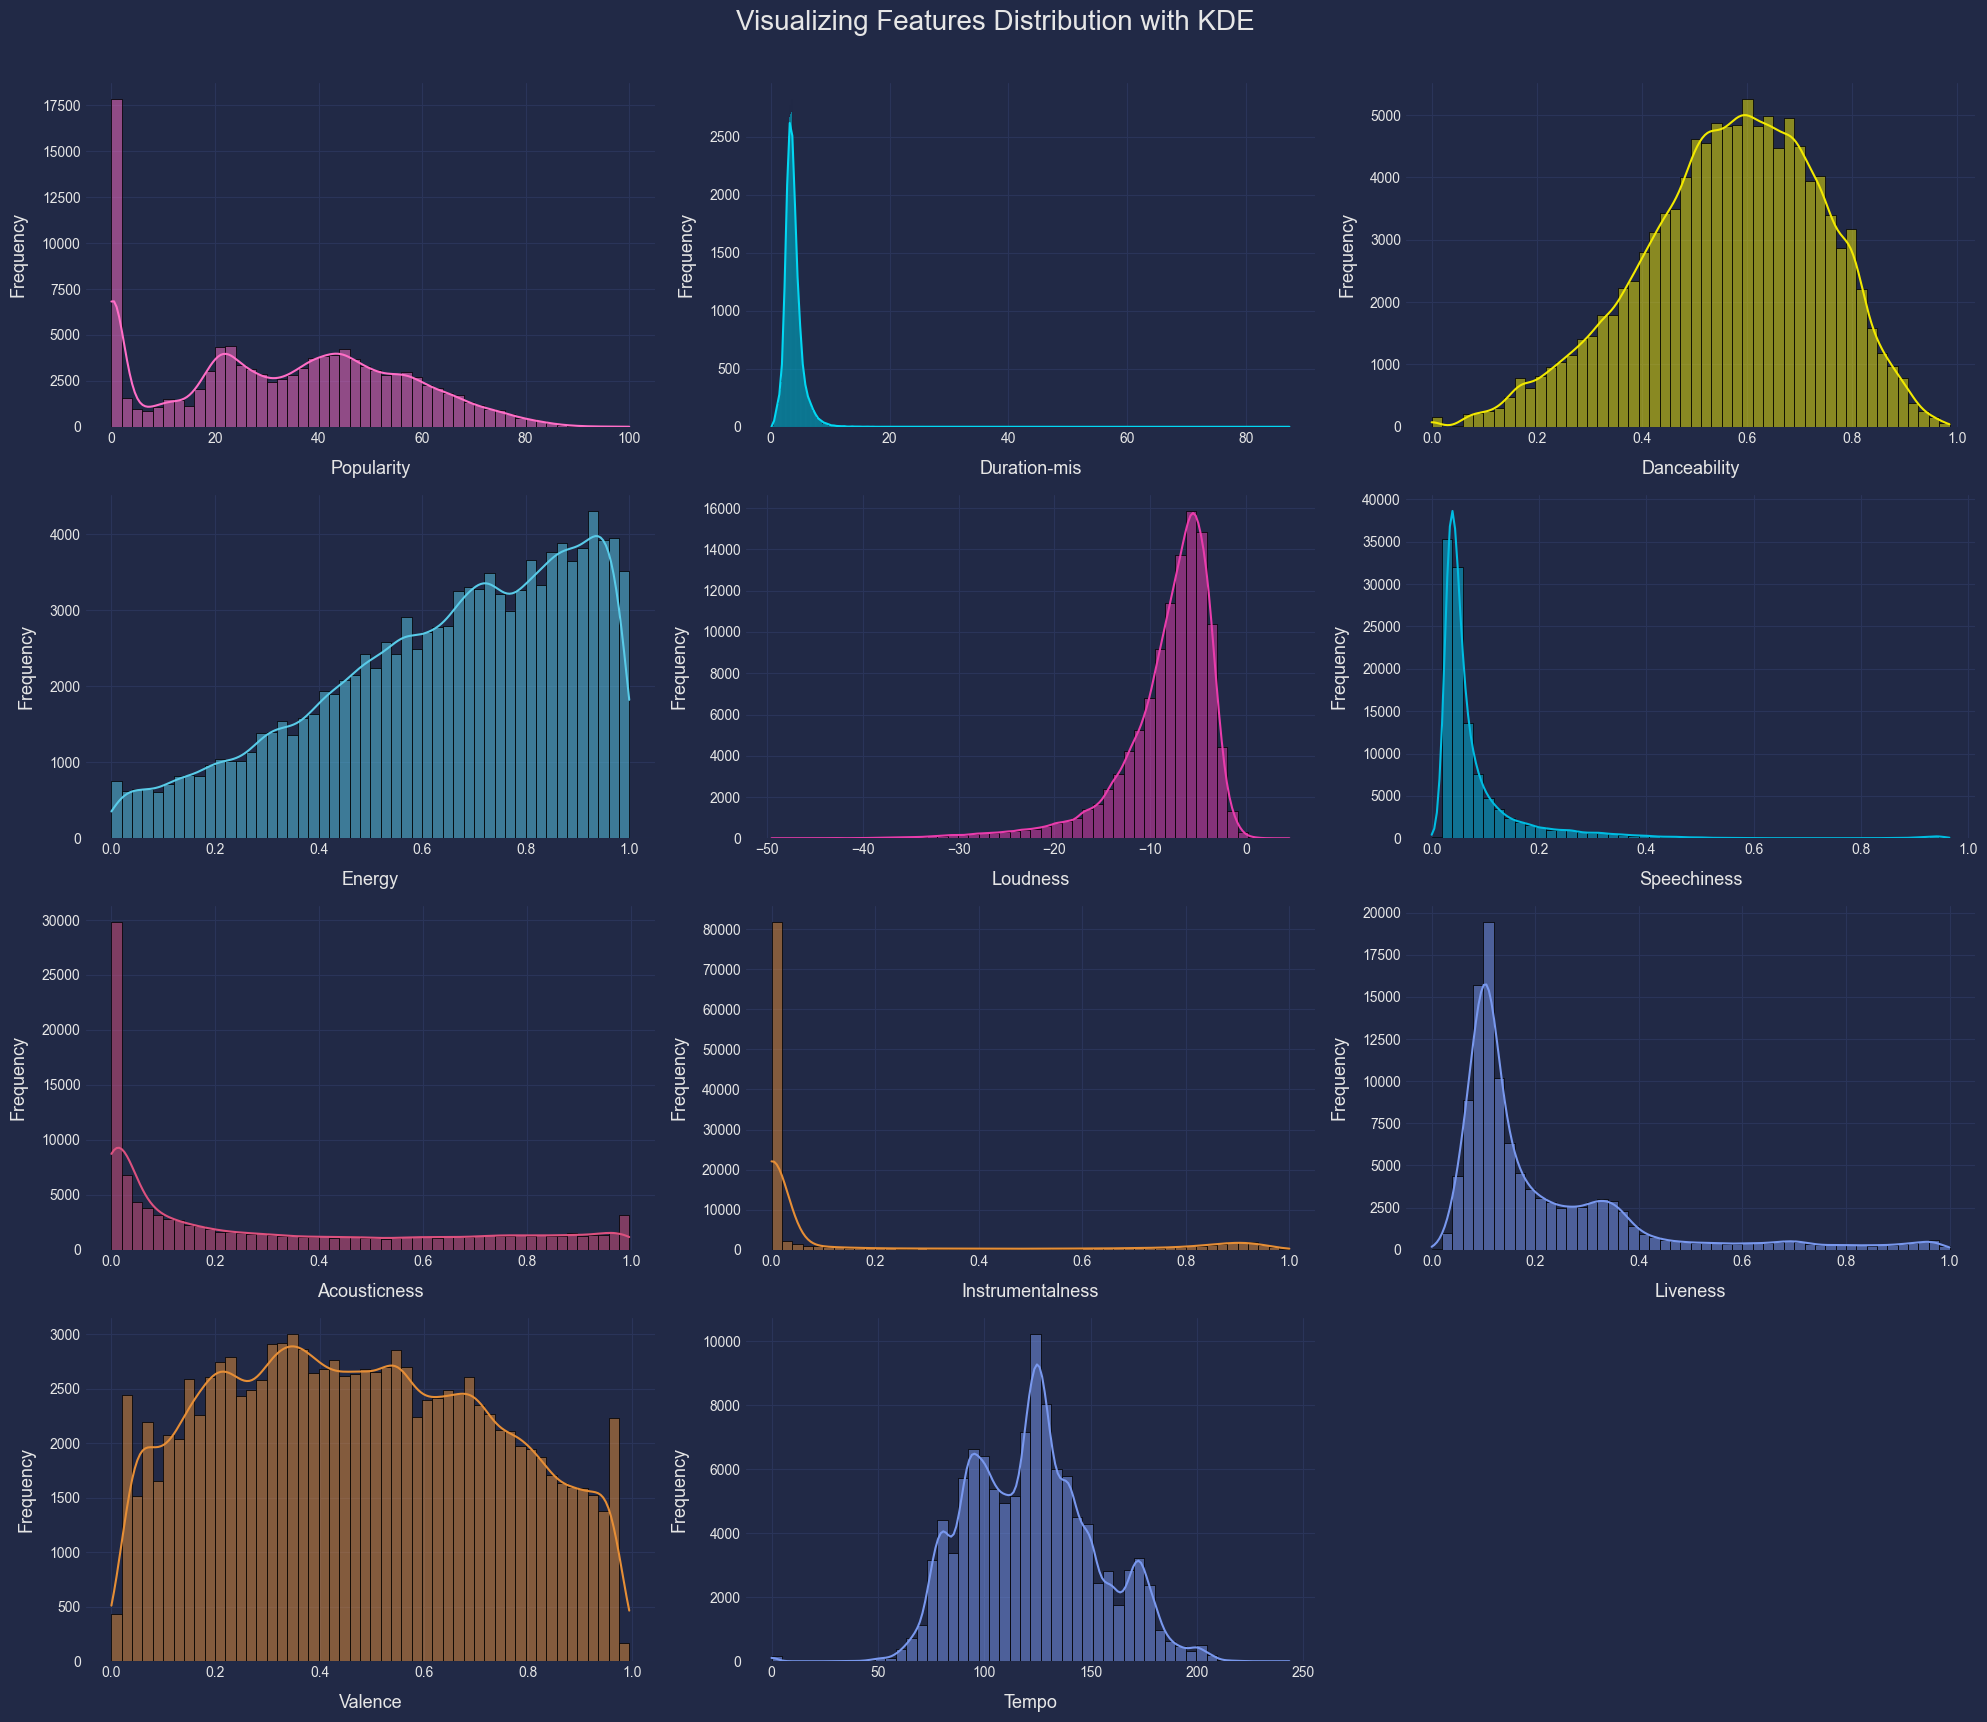

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,17))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# Use Seaborn's dark style

sns.histplot(data=spotify, x="popularity", kde=True, ax=ax[0,0], color='#FF6EC7', bins=50)
ax[0,0].set_xlabel("Popularity", labelpad =10, fontsize=13)
ax[0,0].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=spotify, x="duration_min", kde=True, ax=ax[0,1], color='#02d7f2')
ax[0,1].set_xlabel("Duration-mis", labelpad =10, fontsize=13)
ax[0,1].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=spotify, x="danceability", kde=True, ax=ax[0,2], color='#f2e900', bins=50)
ax[0,2].set_xlabel("Danceability", labelpad =10, fontsize=13)
ax[0,2].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=spotify, x="energy", kde=True, ax=ax[1,0], color='#59CBE8', bins=50)
ax[1,0].set_xlabel("Energy", labelpad =10, fontsize=13)
ax[1,0].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=spotify, x="loudness", kde=True, ax=ax[1,1], color='#E93CAC', bins=50)
ax[1,1].set_xlabel("Loudness", labelpad =10, fontsize=13)
ax[1,1].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=spotify, x="speechiness", kde=True, ax=ax[1,2], color='#00BCE1', bins=50)
ax[1,2].set_xlabel("Speechiness", labelpad =10, fontsize=13)
ax[1,2].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=spotify, x="acousticness", kde=True, ax=ax[2,0], color='#DD517F', bins=50)
ax[2,0].set_xlabel("Acousticness", labelpad =10, fontsize=13)
ax[2,0].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=spotify, x="instrumentalness", kde=True, ax=ax[2,1], color='#E68E36', bins=50)
ax[2,1].set_xlabel("Instrumentalness", labelpad =10, fontsize=13)
ax[2,1].set_ylabel("Frequency", labelpad =10, fontsize=13)


sns.histplot(data=spotify, x="liveness", kde=True, ax=ax[2,2], color='#7998EE', bins=50)
ax[2,2].set_xlabel("Liveness", labelpad =10, fontsize=13)
ax[2,2].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=spotify, x="valence", kde=True, ax=ax[3,0], color='#E68E36', bins=50)
ax[3,0].set_xlabel("Valence", labelpad =10, fontsize=13)
ax[3,0].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=spotify, x="tempo", kde=True, ax=ax[3,1], color='#7998EE', bins=50)
ax[3,1].set_xlabel("Tempo", labelpad =10, fontsize=13)
ax[3,1].set_ylabel("Frequency", labelpad =10, fontsize=13)
plt.delaxes (ax[3,2]) 
fig.suptitle("Visualizing Features Distribution with KDE", fontsize=20,y=1.01)

sns.despine(left=True, bottom=True)
plt.tight_layout()
for row in ax:
    for col in row:
        # add grid lines to each subplot
        col.grid(color='#2A3459')

plt.show()

## Feature Variability and Outliers
In this cell, we will visualize the variability and outliers of each feature using box plots.

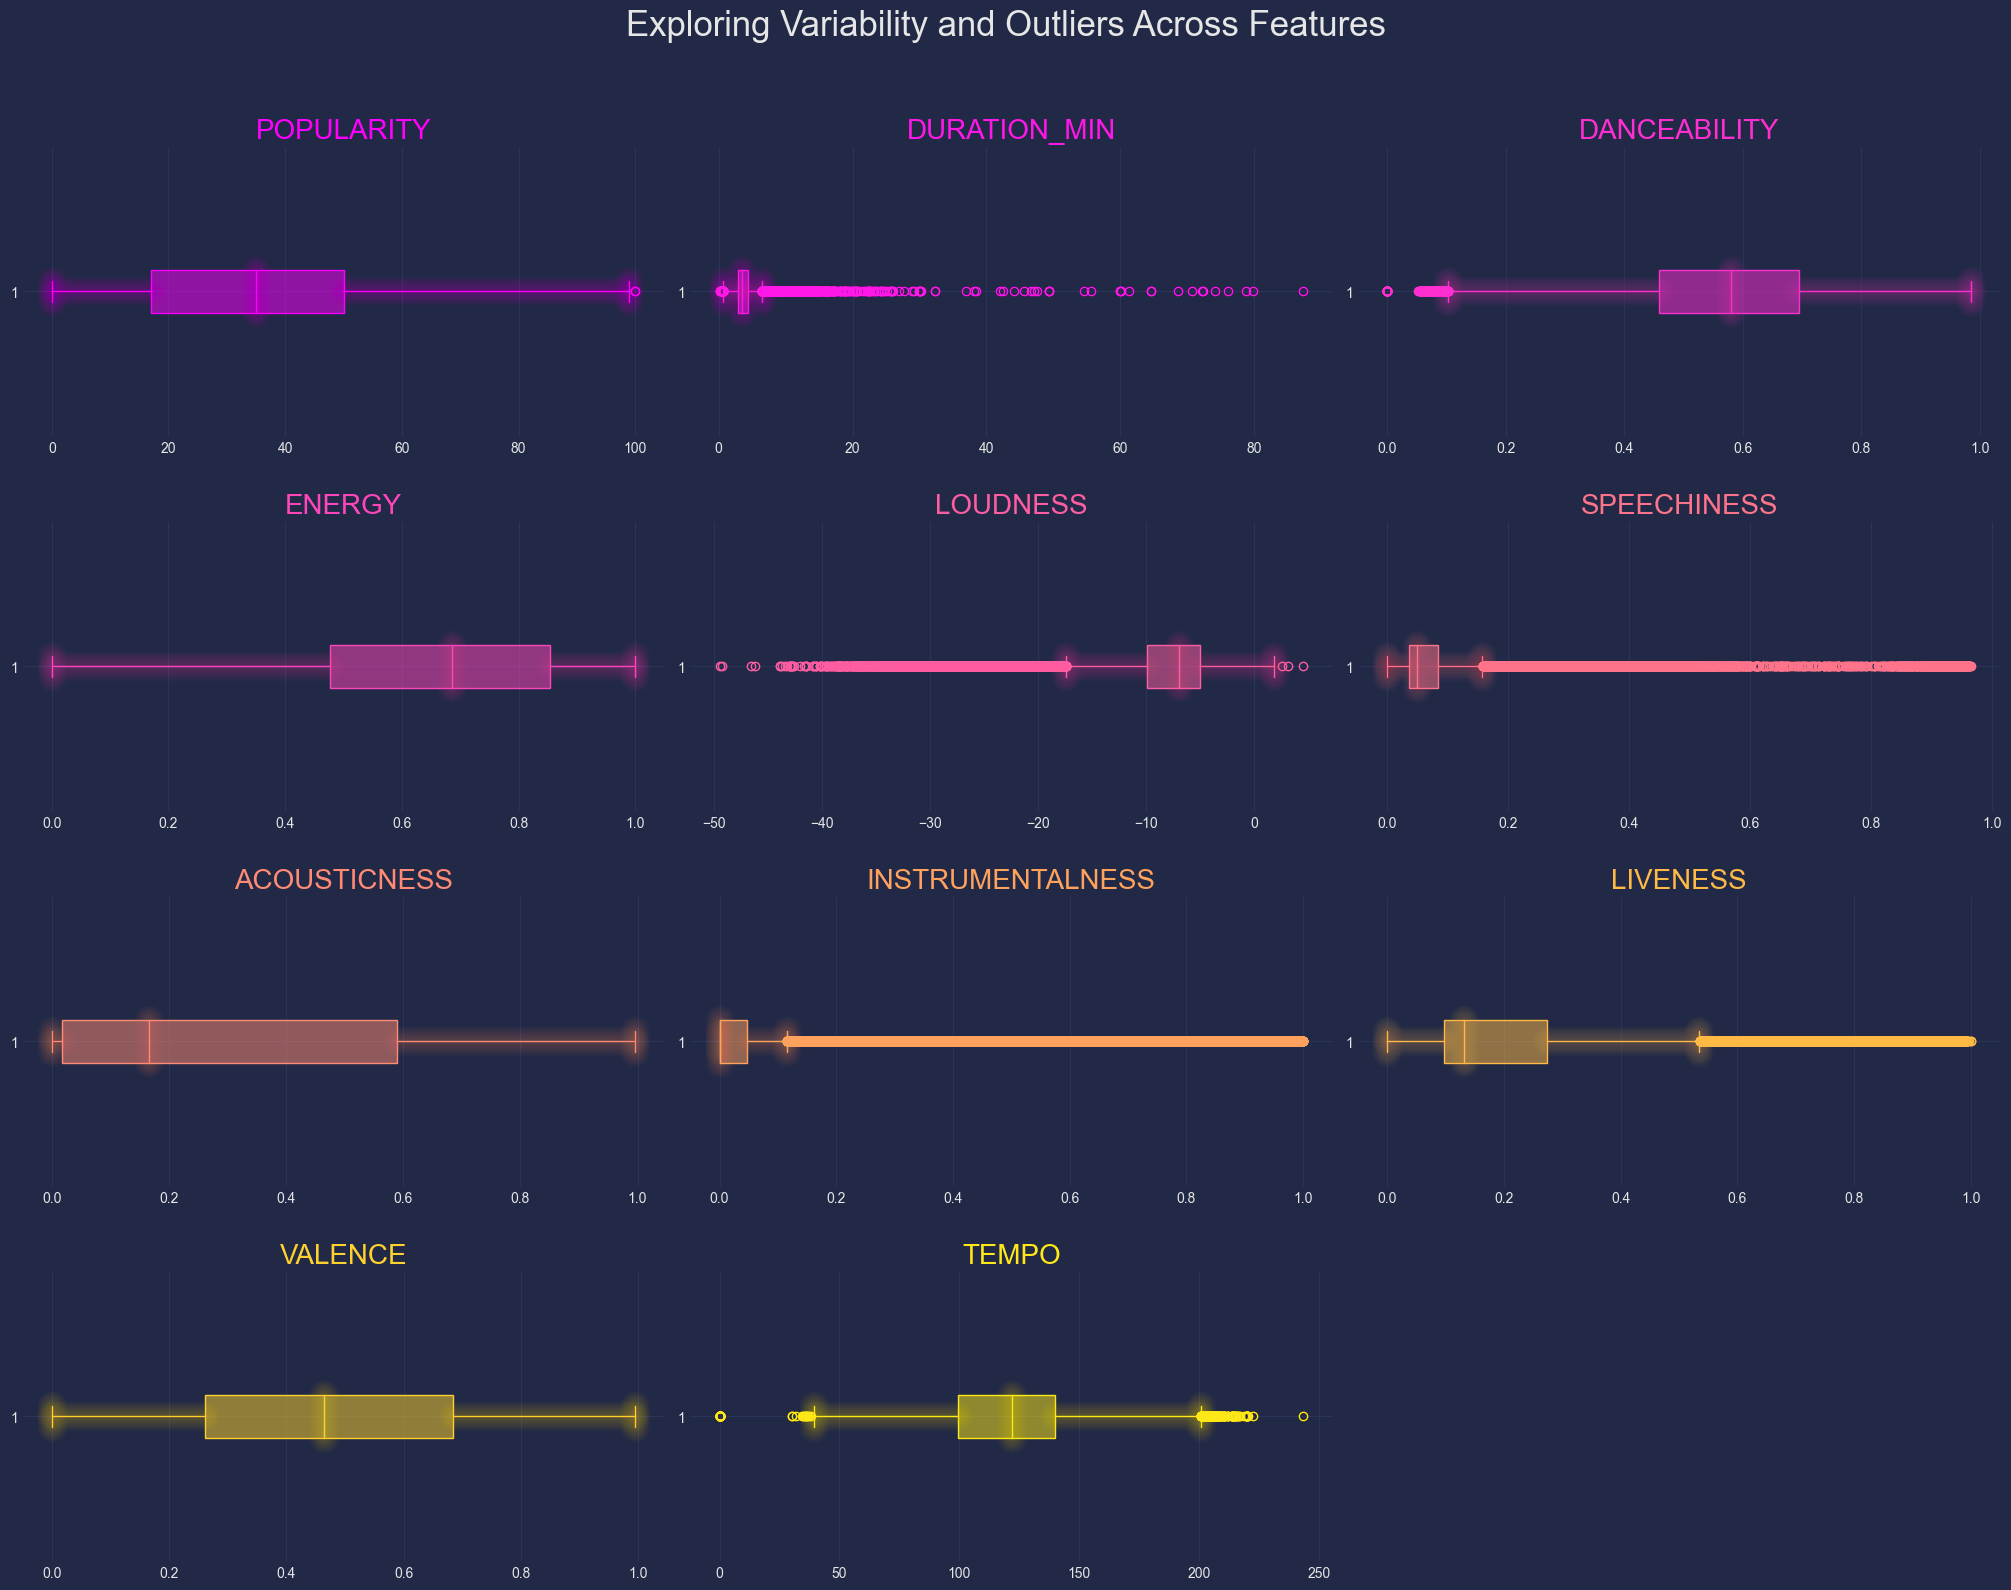

In [12]:
colormap_sect = np.linspace(0, 1, 12)
colors = [cm.spring(x) for x in colormap_sect]
figure, axis = plt.subplots(4, 3, figsize=(20,15), constrained_layout=True)

for column, ax, color in zip(['popularity', 'duration_min', 'danceability', 'energy', 'loudness',
                               'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'], axis.ravel(), colors):
    # Add alpha to the color
    color_with_alpha = list(color)
    color_with_alpha[3] = 0.5  # Set alpha to 0.5
    bplot = ax.boxplot(spotify[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor=color_with_alpha, color=color), capprops=dict(color=color),
                        whiskerprops=dict(color=color), flierprops=dict(color=color, markeredgecolor=color), medianprops=dict(color=color))
    ax.set_title(f"\n{column.upper()}", size=20, color=color)
    mplcyberpunk.make_lines_glow(ax, n_glow_lines=20)

plt.delaxes(axis[3,2])
figure.suptitle("Exploring Variability and Outliers Across Features", fontsize=25,y=1.05)

plt.show()

## Now let's dig deep to our data and get more insights 
Lets preview the following features:
- Mode, Explicit, and Time Signature
- Musical Keys
- Speechniess
- Instrumentalness
- liveness
- Artists and their albums insights
- Genre Insights

## Mode, Explicit, and Time Signature

- The explicit variable indicates whether a track contains explicit content or not. and we can see that the majority of the data are not explicit

- The mode variable indicates the modality of a track, where track in the major key tends to be upbeat and joyful while a track in the minor key tends to be sad or reflective. and we can see that about 60% of the tracks are played in the major keys.

- The time signature can influence the way humans perceive and experience music. It can evoke specific emotions and affect the mood of a composition. For instance, music with a fast tempo and a time signature that emphasizes strong beats has been found to evoke positive emotions such as happiness, excitement, and liveliness. Conversely, music with a slow tempo and a time signature that emphasizes weak beats can evoke negative emotions such as sadness and melancholy .



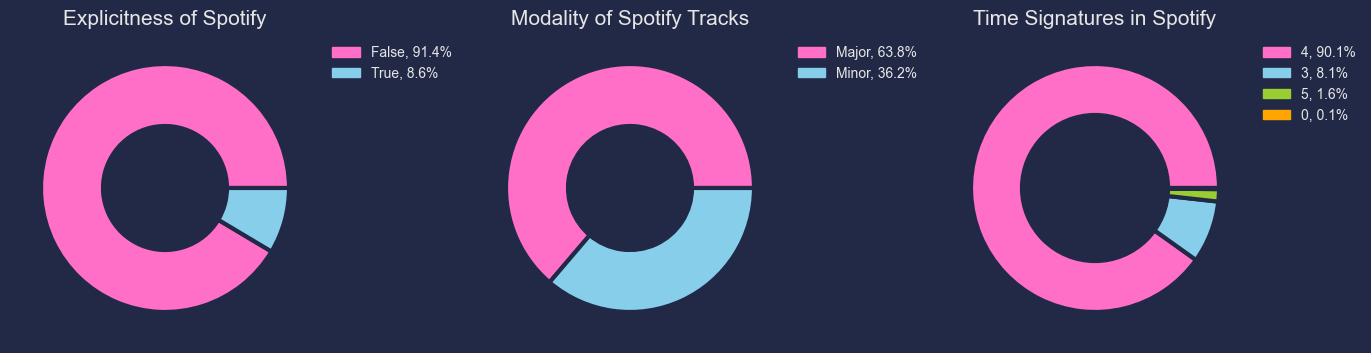

In [13]:
import matplotlib.patches as mpatches

def plot_donut_chart(df: pd.DataFrame, column: str, ax: plt.Axes, title: str):
    pieData = pd.DataFrame(df[column].value_counts())
    labels = pieData.index.values
    sizes = pieData[column].values
    colors = ['#FF6EC7','skyblue', 'yellowgreen', 'orange']

    # Set width to 0.5 for both charts
    ax.pie(sizes, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor': '#212946', 'width': 0.5})

    # Create a white circle at the center to turn the pie chart into a donut chart
    center_circle = plt.Circle((0, 0), 0.6, color='#212946')
    fig = ax.get_figure()
    fig.gca().add_artist(center_circle)
    
    percents = sizes * 100 / sizes.sum()
    labels = [f'{l}, {p:0.1f}%' for l, p in zip(labels, percents)]
    patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
    
    ax.legend(handles=patches, bbox_to_anchor=(1.0, 1), loc='upper left')
    

    ax.set_title(title, fontsize=15)
    ax.set_aspect('equal')  # Set the aspect ratio to be equal
fig, ax = plt.subplots(1, 3, figsize=(16, 12))

# Explicitness of Spotify
plot_donut_chart(spotify, 'explicit', ax[0], 'Explicitness of Spotify')

# Modality of Spotify Tracks
spotify["modeText"]=np.where(spotify["mode"] == 1.0,"Major","Minor")
plot_donut_chart(spotify, 'modeText', ax[1], 'Modality of Spotify Tracks')

plot_donut_chart(spotify, 'time_signature',ax[2], 'Time Signatures in Spotify')
# Adjust subplot spacing

plt.subplots_adjust(wspace=0.5)

plt.show()

## Counting Musical Keys

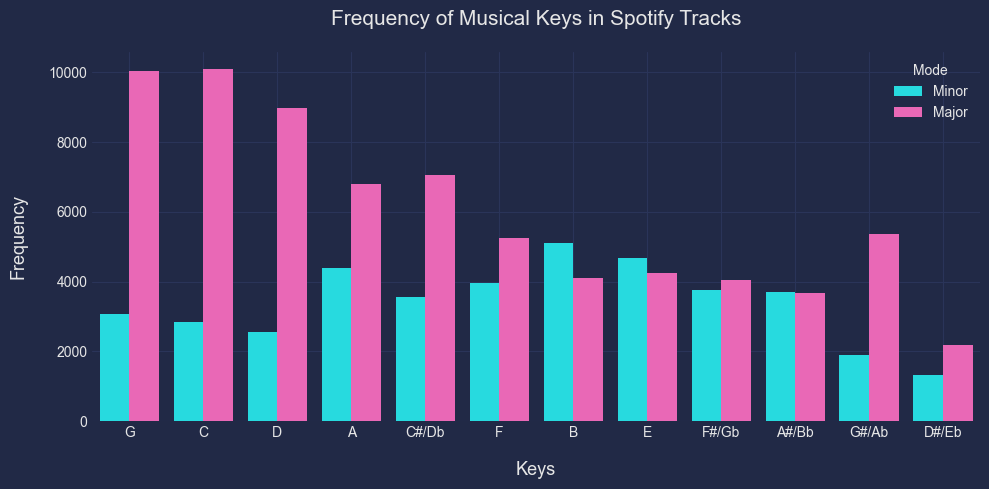

In [162]:
key_mapping = {
    0: 'C',
    1: 'C#/Db',
    2: 'D',
    3: 'D#/Eb',
    4: 'E',
    5: 'F',
    6: 'F#/Gb',
    7: 'G',
    8: 'G#/Ab',
    9: 'A',
    10: 'A#/Bb',
    11: 'B'
}

plt.figure(figsize=(10, 5))
ax=sns.countplot(data = spotify, x= "key",order= spotify['key'].value_counts().index,hue="modeText")
ax.set_title("Frequency of Musical Keys in Spotify Tracks", fontsize=15,y=1.05)
ax.set_xlabel("Keys", labelpad =15, fontsize=13)
ax.set_ylabel("Frequency", labelpad =15, fontsize=13)
ax.set_xticklabels([key_mapping[key] for key in spotify['key'].value_counts().index])
ax.legend().set_title('Mode')


sns.despine(left=True, bottom=True)
plt.tight_layout()
ax.grid(color='#2A3459')

plt.show()

## And this is an illustration for the keys on the piano
![image-2](image.png)


## Duration in minutes analysis

Tracks that are more than 6.5 minutes tends to be less popular

Upper whisker point 6.539166666666665
The  popularity Skewness is  0.04051815204017053
The  danceability Skewness is  -0.401575900323765
The  energy Skewness is  -0.6027088369445242
The  valence Skewness is  0.11092243101844985


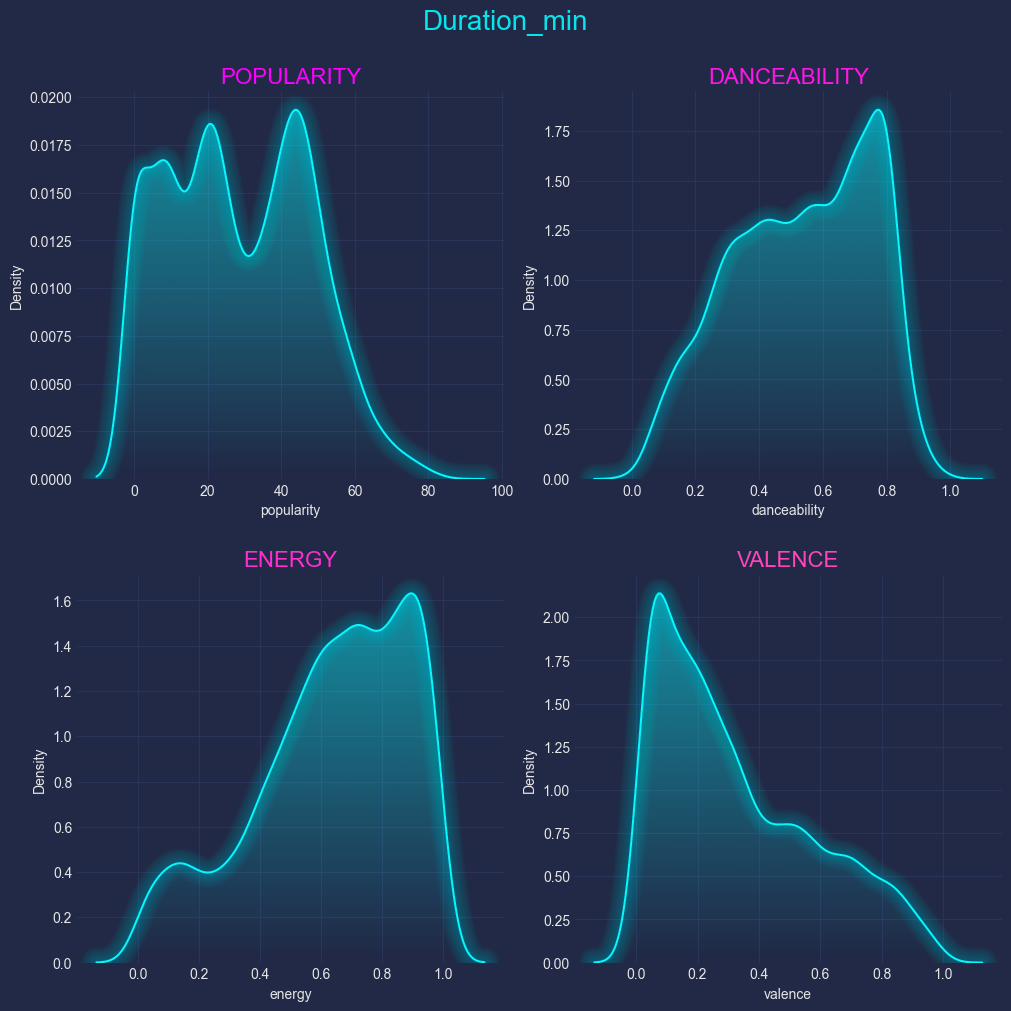

In [172]:
columnVSfeaturesHist("duration_min")

Upper whisker point 0.1574
The  popularity Skewness is  0.04051815204017053
The  danceability Skewness is  -0.401575900323765
The  energy Skewness is  -0.6027088369445242
The  valence Skewness is  0.11092243101844985


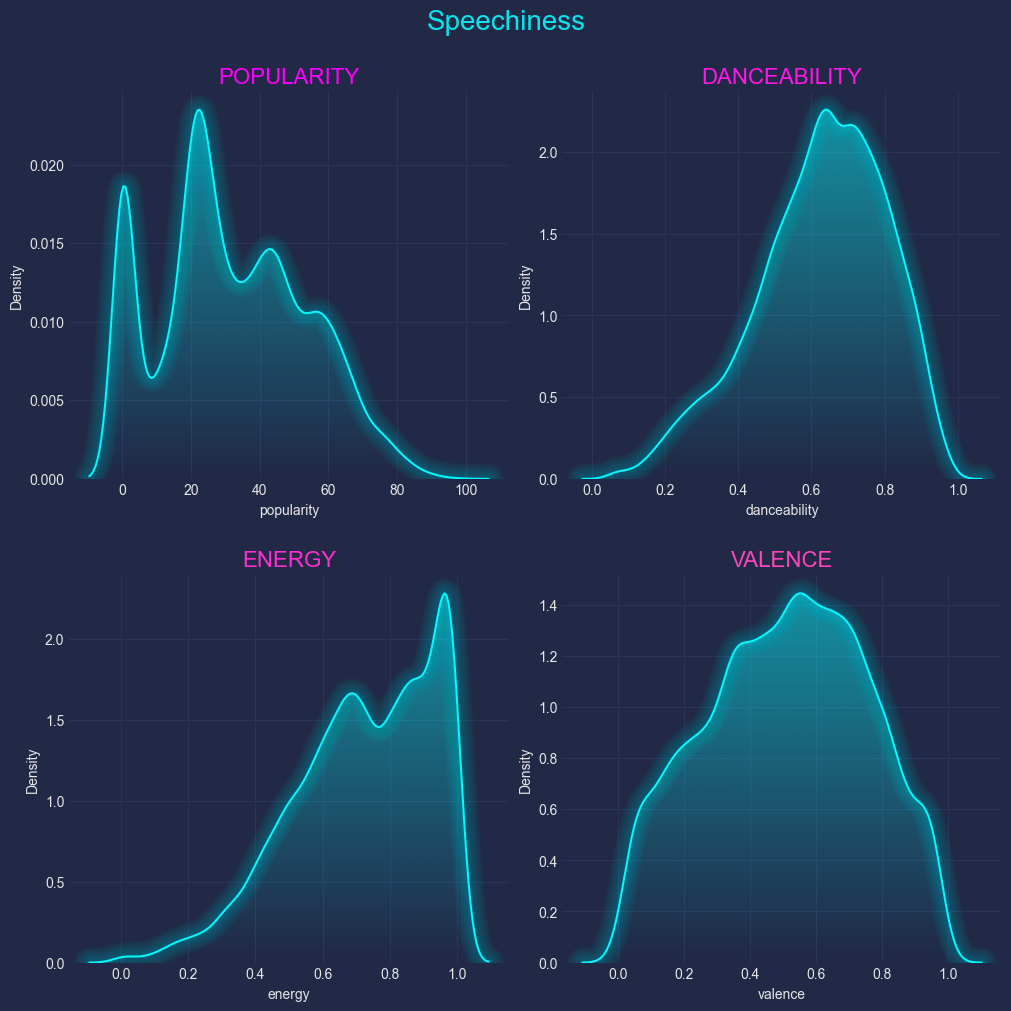

In [173]:
columnVSfeaturesHist("speechiness")

Upper whisker point 0.11599999999999999
The  popularity Skewness is  0.04051815204017053
The  danceability Skewness is  -0.401575900323765
The  energy Skewness is  -0.6027088369445242
The  valence Skewness is  0.11092243101844985


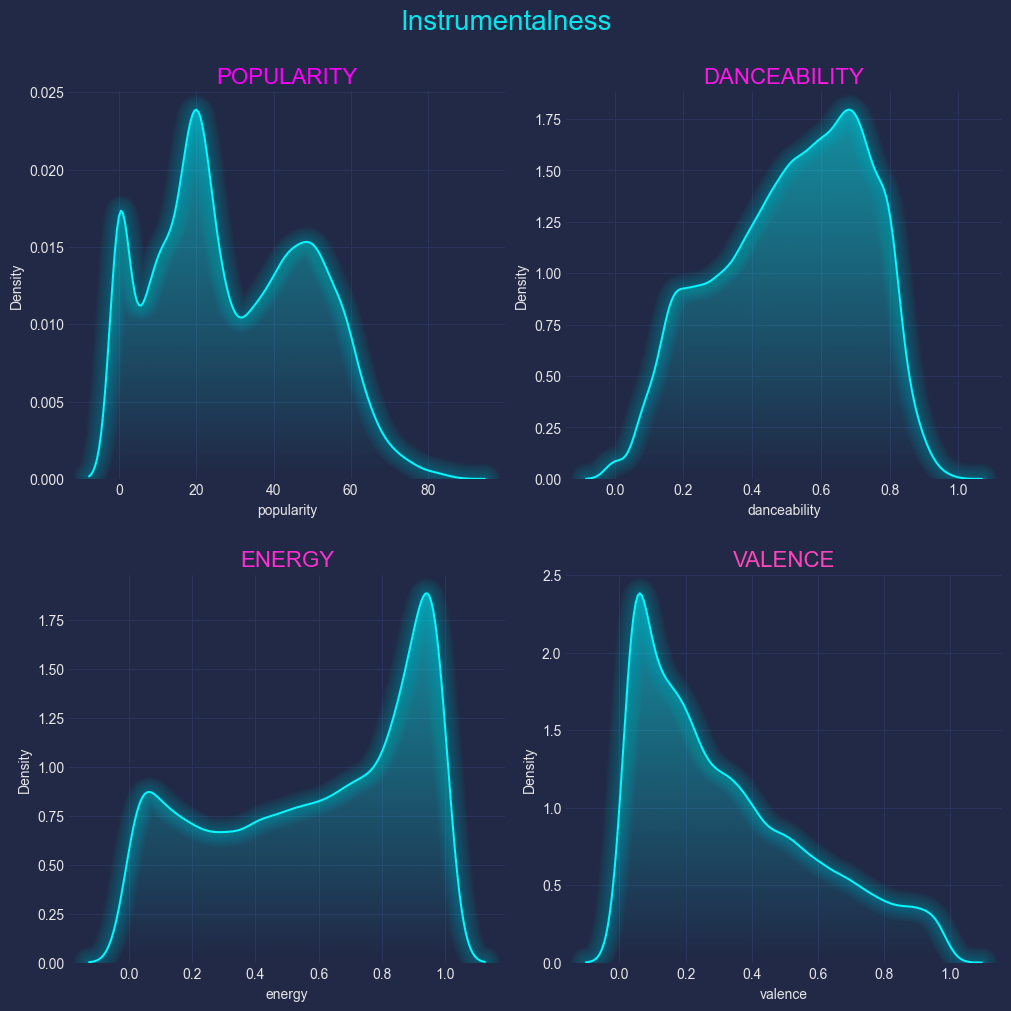

In [174]:
columnVSfeaturesHist("instrumentalness")

Upper whisker point 0.5356500000000001
The  popularity Skewness is  0.04051815204017053
The  danceability Skewness is  -0.401575900323765
The  energy Skewness is  -0.6027088369445242
The  valence Skewness is  0.11092243101844985


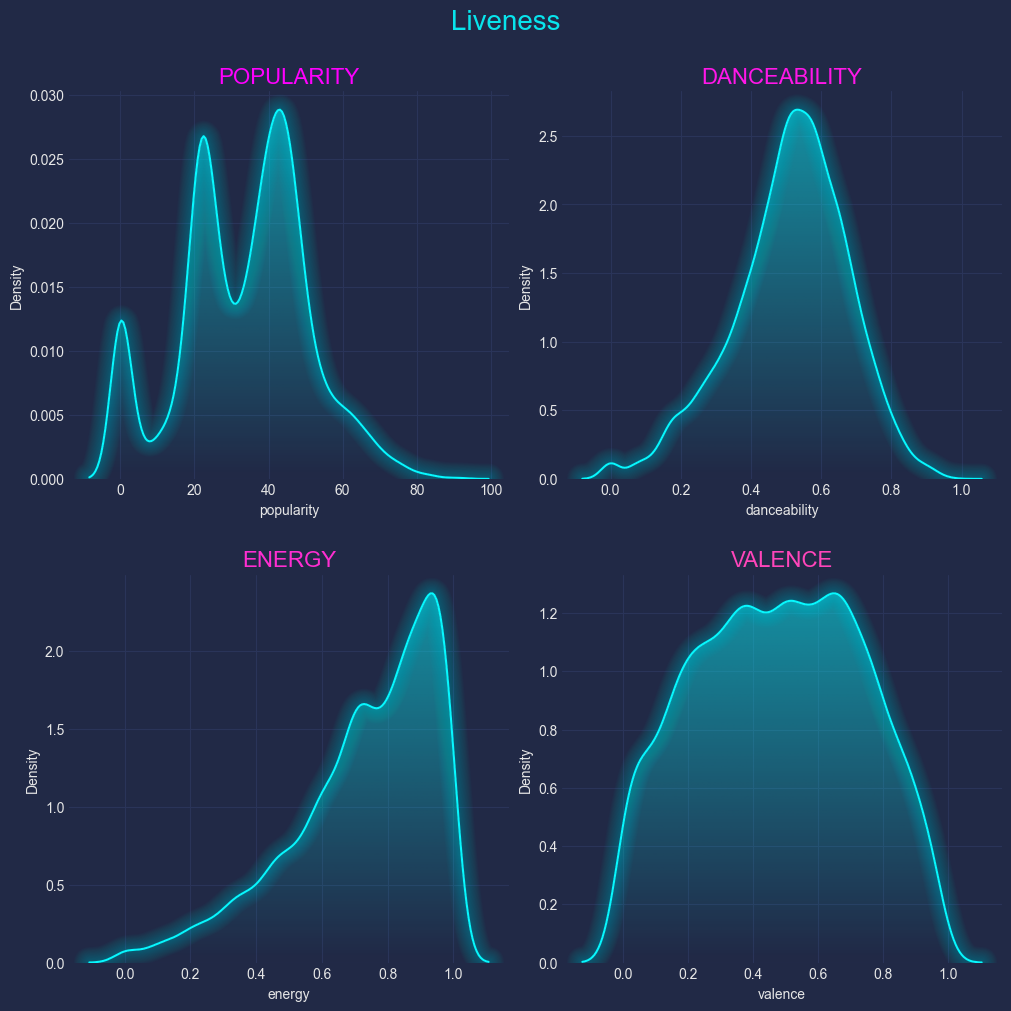

In [175]:
columnVSfeaturesHist("liveness")

## In conclusion 
When the previous features [Duration in minutes,Speechniess, Instrumentalness, liveness] tend to increase more than their upper whisker the density of popular songs tends decrease while the danceability & energy of the songs increase and lastly the valence of the songs varies from one feature to another

## Artists and Albums insights 
- We find that The beatles, Linkin Park & BTS are the top popular artists among spotify users while Feid,The beatles & George Jones produce songs that have high danceability
- We can notice that the Beatles, Prateek kuhad,Elvis Presley are the top 3 heard artists when spotify users are in good mood while on the other hand Linkin Park, BTS, Arctic Monkeys are the top 3 when the users are in bad mood

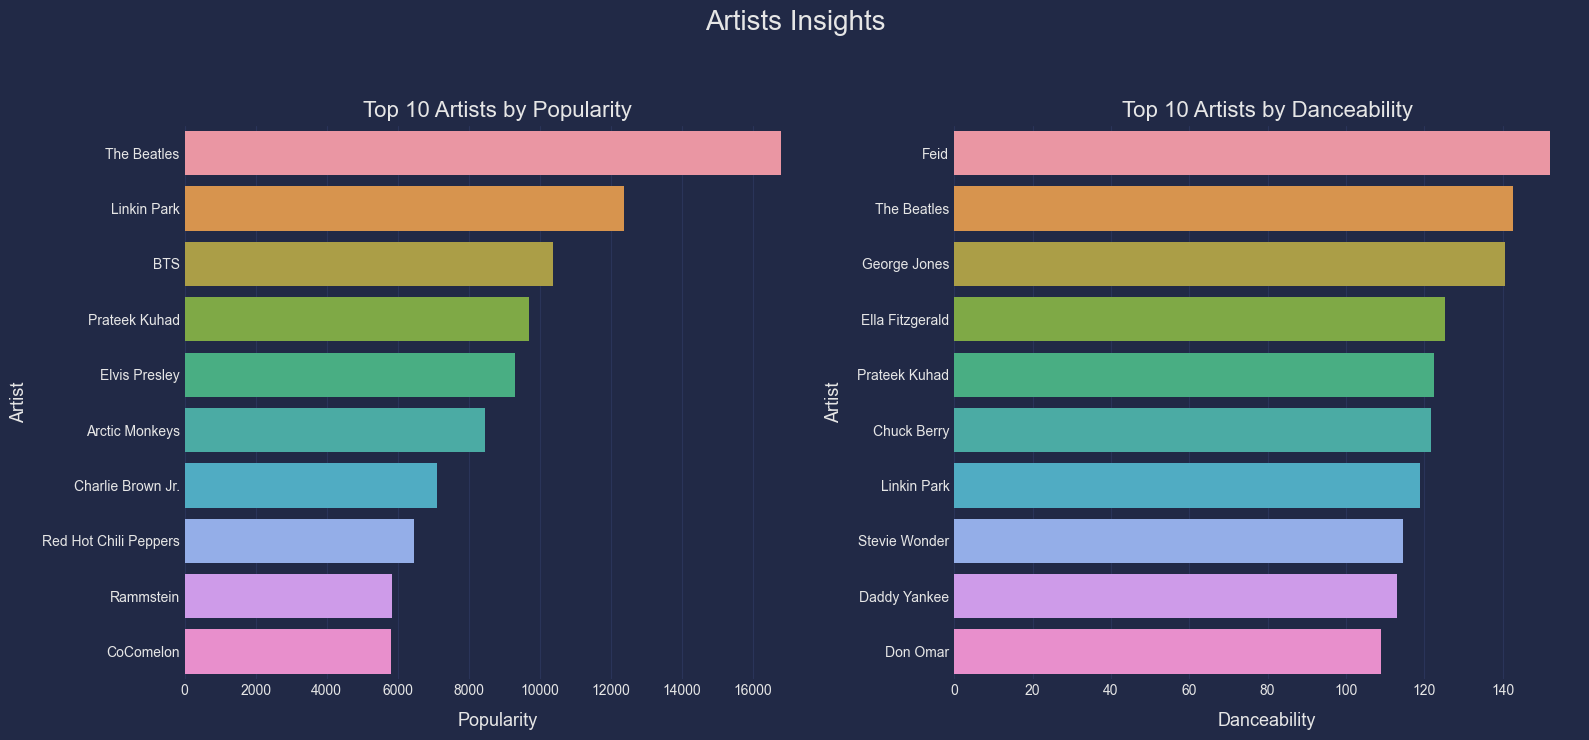

In [169]:

pop_artist = spotify.groupby('artists').agg({'popularity': 'sum'}).sort_values('popularity', ascending=False).iloc[:10]
dance_artist = spotify.groupby('artists').agg({'danceability': 'sum'}).sort_values('danceability', ascending=False).iloc[:10]
fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(16,7))
sns.barplot(y=pop_artist.index, x=pop_artist['popularity'],ax=ax[0],orient="h")
ax[0].set_ylabel('Artist',labelpad =10, fontsize=13)
ax[0].set_xticklabels(ax[0].get_xticklabels())
ax[0].set_xlabel("Popularity", labelpad =10, fontsize=13)
ax[0].set_title('Top 10 Artists by Popularity', fontsize=16)

sns.barplot(y=dance_artist.index, x=dance_artist['danceability'], ax=ax[1],orient="h")
ax[1].set_ylabel('Artist',labelpad =10, fontsize=13)
ax[1].set_xticklabels(ax[1].get_xticklabels())
ax[1].set_xlabel("Danceability", labelpad =10, fontsize=13)
ax[1].set_title('Top 10 Artists by Danceability', fontsize=16)
fig.suptitle("Artists Insights", fontsize=20,y=1.05)

plt.tight_layout()
plt.show()

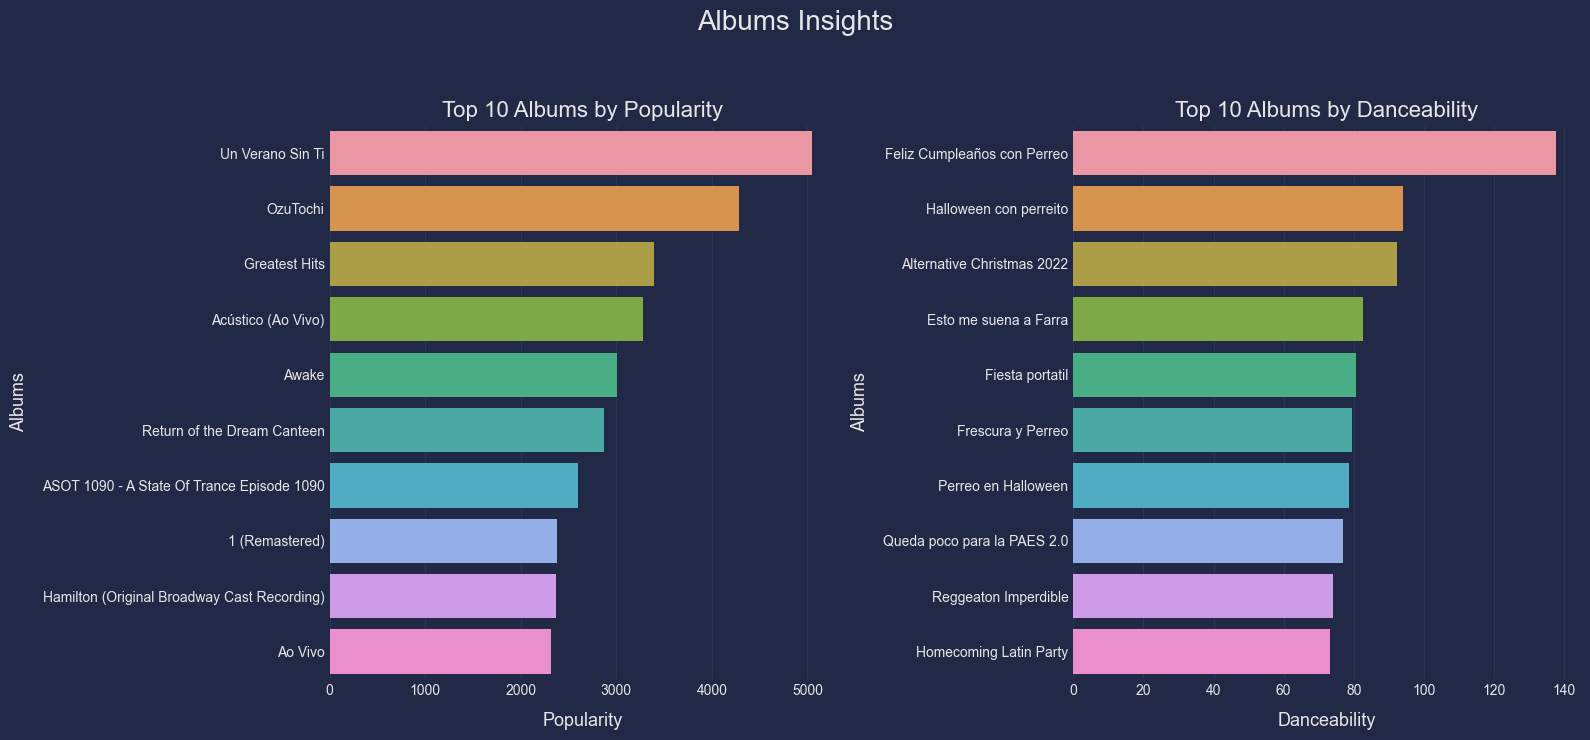

In [167]:
pop_album= spotify.groupby('album_name').agg({'popularity': 'sum'}).sort_values('popularity', ascending=False).iloc[:10]
dance_album= spotify.groupby('album_name').agg({'danceability': 'sum'}).sort_values('danceability', ascending=False).iloc[:10]
fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(16,7))
sns.barplot(y=pop_album.index, x=pop_album['popularity'],ax=ax[0],orient="h")
ax[0].set_ylabel('Albums',labelpad =10, fontsize=13)
ax[0].set_xticklabels(ax[0].get_xticklabels())
ax[0].set_xlabel("Popularity", labelpad =10, fontsize=13)
ax[0].set_title('Top 10 Albums by Popularity', fontsize=16)

sns.barplot(y=dance_album.index, x=dance_album['danceability'], ax=ax[1],orient="h")
ax[1].set_ylabel('Albums',labelpad =10, fontsize=13)
ax[1].set_xticklabels(ax[1].get_xticklabels())
ax[1].set_xlabel("Danceability", labelpad =10, fontsize=13)
ax[1].set_title('Top 10 Albums by Danceability', fontsize=16)
fig.suptitle("Albums Insights", fontsize=20,y=1.05)

plt.tight_layout()
plt.show()

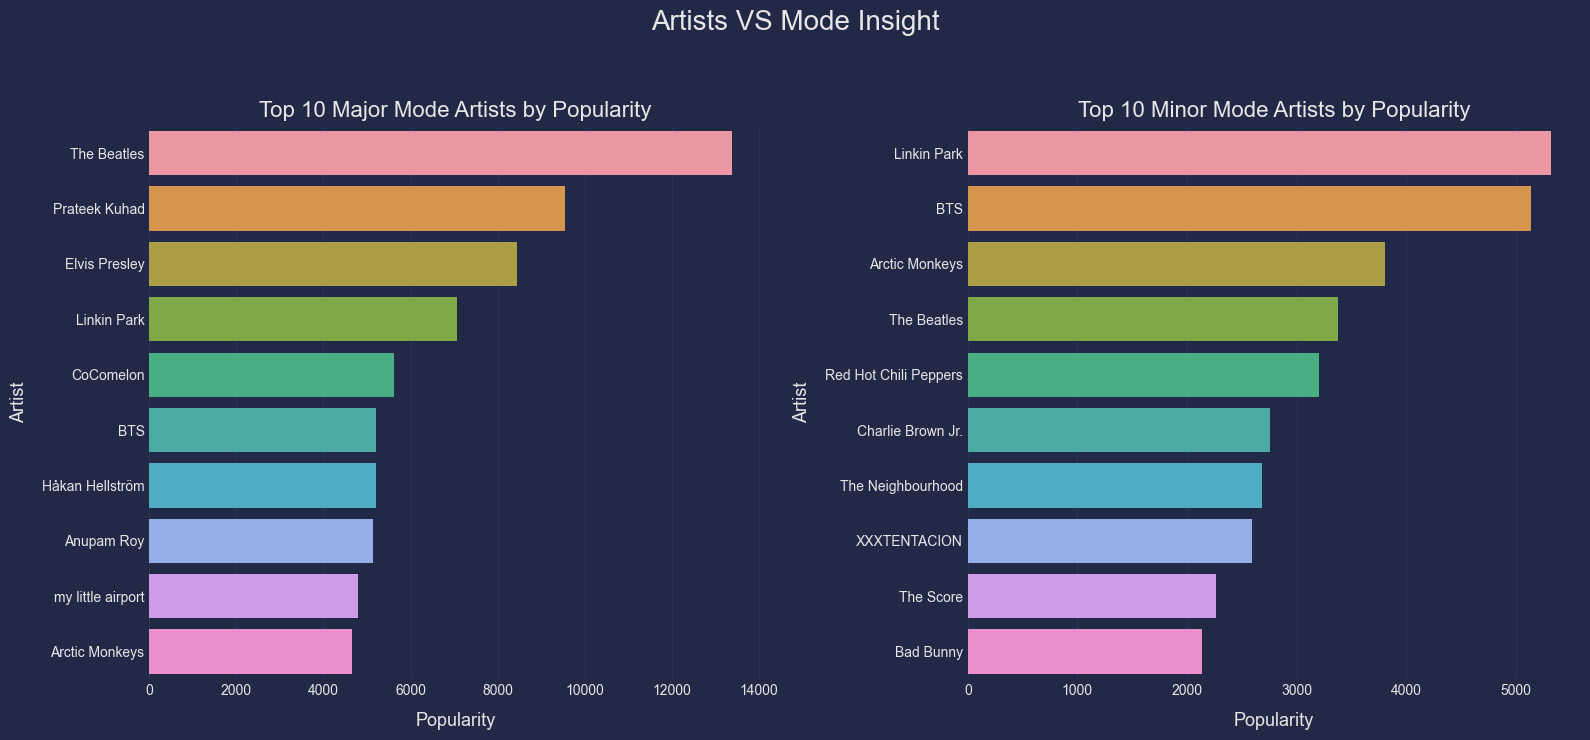

In [168]:
MajorSongsArtists=spotify[spotify["mode"]==1]
MinorSongsArtists=spotify[spotify["mode"]==0]
Major_artist = MajorSongsArtists.groupby('artists').agg({'popularity': 'sum'}).sort_values('popularity', ascending=False).iloc[:10]
Minor_artist = MinorSongsArtists.groupby('artists').agg({'popularity': 'sum'}).sort_values('popularity', ascending=False).iloc[:10]
fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(16,7))
sns.barplot(y=Major_artist.index, x=Major_artist['popularity'],ax=ax[0],orient="h")
ax[0].set_ylabel('Artist',labelpad =10, fontsize=13)
ax[0].set_xticklabels(ax[0].get_xticklabels())
ax[0].set_xlabel("Popularity", labelpad =10, fontsize=13)
ax[0].set_title('Top 10 Major Mode Artists by Popularity', fontsize=16)

sns.barplot(y=Minor_artist.index, x=Minor_artist['popularity'], ax=ax[1],orient="h")
ax[1].set_ylabel('Artist',labelpad =10, fontsize=13)
ax[1].set_xticklabels(ax[1].get_xticklabels())
ax[1].set_xlabel("Popularity", labelpad =10, fontsize=13)
ax[1].set_title('Top 10 Minor Mode Artists by Popularity', fontsize=16)
fig.suptitle("Artists VS Mode Insight", fontsize=20,y=1.05)

plt.tight_layout()
plt.show()

# Genre Insights
- We can see that the most popular Genre is pop-film & most Danceable Genre is the kids and the chicago-house comes after it 
- And according to your mode if you are happy you will can listen to sertanejo or World - music or you can listen to k-pop,turkish or french if you feel sad and low

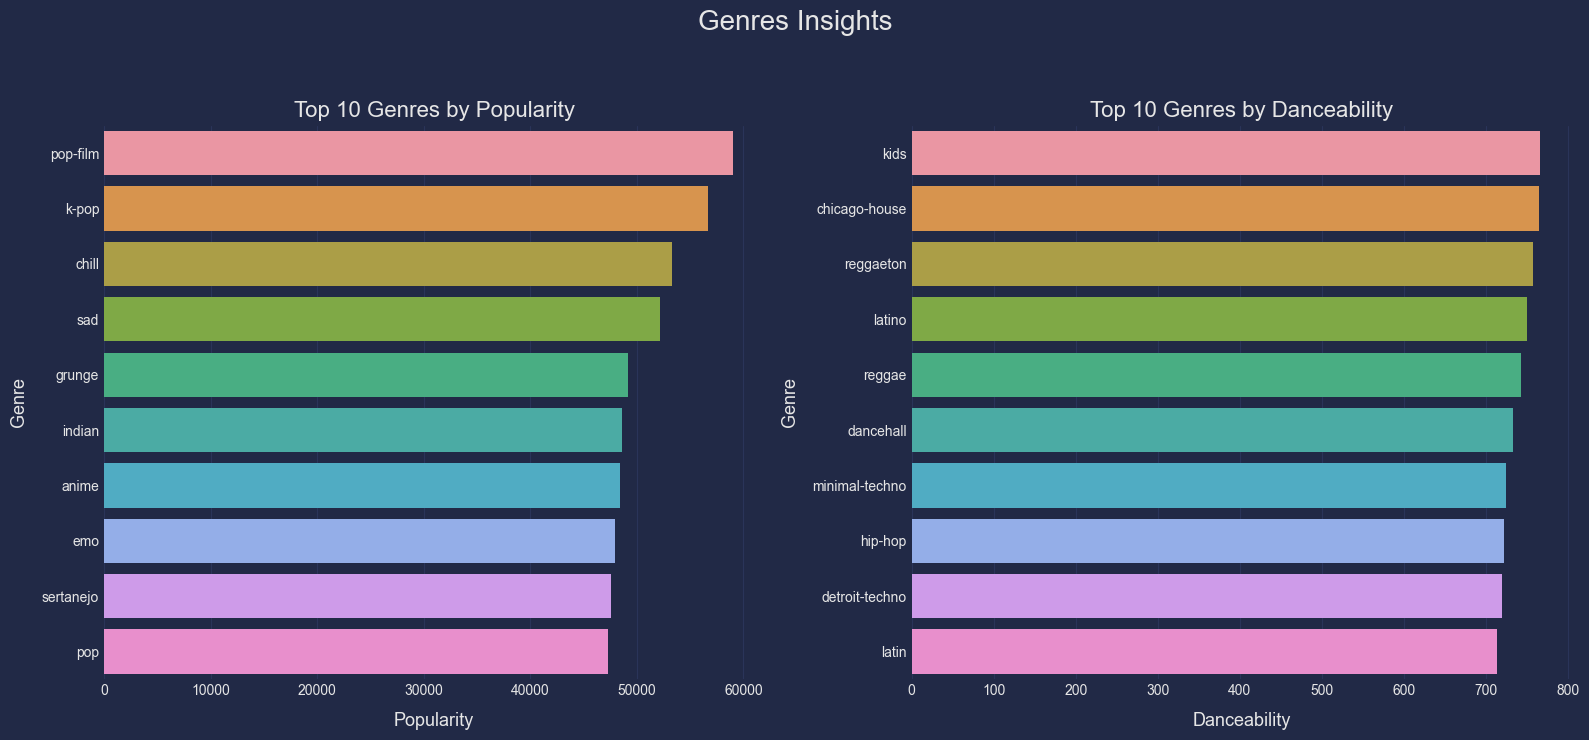

In [170]:

pop_artist = spotify.groupby('track_genre').agg({'popularity': 'sum'}).sort_values('popularity', ascending=False).iloc[:10]
dance_artist = spotify.groupby('track_genre').agg({'danceability': 'sum'}).sort_values('danceability', ascending=False).iloc[:10]
fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(16,7))
sns.barplot(y=pop_artist.index, x=pop_artist['popularity'],ax=ax[0],orient="h")
ax[0].set_ylabel('Genre',labelpad =10, fontsize=13)
ax[0].set_xticklabels(ax[0].get_xticklabels())
ax[0].set_xlabel("Popularity", labelpad =10, fontsize=13)
ax[0].set_title('Top 10 Genres by Popularity', fontsize=16)

sns.barplot(y=dance_artist.index, x=dance_artist['danceability'], ax=ax[1],orient="h")
ax[1].set_ylabel('Genre',labelpad =10, fontsize=13)
ax[1].set_xticklabels(ax[1].get_xticklabels())
ax[1].set_xlabel("Danceability", labelpad =10, fontsize=13)
ax[1].set_title('Top 10 Genres by Danceability', fontsize=16)
fig.suptitle("Genres Insights", fontsize=20,y=1.05)

plt.tight_layout()
plt.show()

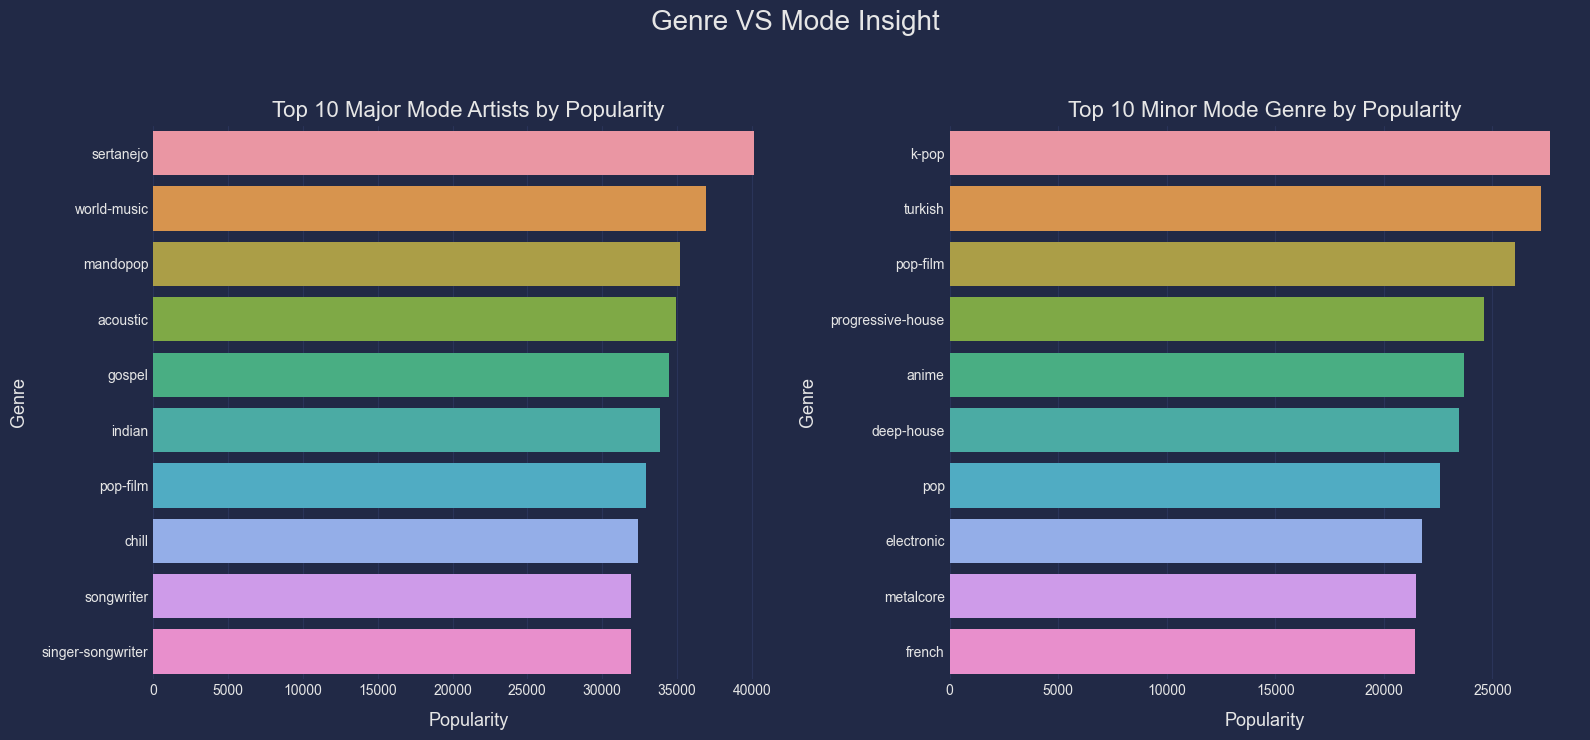

In [176]:
MajorSongsGenre=spotify[spotify["mode"]==1]
MinorSongsGenre=spotify[spotify["mode"]==0]
Major_genre = MajorSongsArtists.groupby('track_genre').agg({'popularity': 'sum'}).sort_values('popularity', ascending=False).iloc[:10]
Minor_genre = MinorSongsArtists.groupby('track_genre').agg({'popularity': 'sum'}).sort_values('popularity', ascending=False).iloc[:10]
fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(16,7))
sns.barplot(y=Major_genre.index, x=Major_genre['popularity'],ax=ax[0],orient="h")
ax[0].set_ylabel('Genre',labelpad =10, fontsize=13)
ax[0].set_xticklabels(ax[0].get_xticklabels())
ax[0].set_xlabel("Popularity", labelpad =10, fontsize=13)
ax[0].set_title('Top 10 Major Mode Artists by Popularity', fontsize=16)

sns.barplot(y=Minor_genre.index, x=Minor_genre['popularity'], ax=ax[1],orient="h")
ax[1].set_ylabel('Genre',labelpad =10, fontsize=13)
ax[1].set_xticklabels(ax[1].get_xticklabels())
ax[1].set_xlabel("Popularity", labelpad =10, fontsize=13)
ax[1].set_title('Top 10 Minor Mode Genre by Popularity', fontsize=16)
fig.suptitle("Genre VS Mode Insight", fontsize=20,y=1.05)

plt.tight_layout()
plt.show()

## Based on the data description we found that there are main 4 features that will make the people dance which are :
1.  Popularity (That indicates whether the song is popular)
2.  Danceability (and this indicates if the people will make the people dance or not)
3.  Energy (How energetic the song is)
4.  Valance (that represents the track's positiveness)

# Data Preprocessing
- Handling Outliers: we scale the data using robust scaler to make data less sensitive for outliers by using median and IQR for scaling
- Feature Selection: we select the most relevant and important features for modeling

## Observations and study the parameters (features) 
we will apply different machine learning models to the data to calculate the score of features to determine which features play a vital role in song's danceability
- We added a column called Danceable and this feature is generated after our analysis where we chose the best values for the features [danceability, popularity, energy, valence] that we found that they may affect the people's vibes
- As we are not going to use the 'genre column'; we needed to drop the duplicated Track IDs
- And from my thoughts I guess that Labeling the artist might help the model in prediction

In [107]:
spotify.drop(["modeText"],inplace=True,axis=1)
lb=LabelEncoder()
robust_scaler= RobustScaler()
spotify['artist']= lb.fit_transform(spotify['artists'])
spotify.drop_duplicates(subset=['track_id'], inplace=True)
spotify["danceable"]=0
spotify.loc[(spotify['danceability'] >= 0.626) & (spotify['popularity'] >= 49) & (spotify['energy'] >= 0.6) & (spotify['valence'] >= 0.55), 'danceable'] = 1

X= spotify.drop(['track_id','artists','album_name','track_name','track_genre','danceability'],axis=1)
y= spotify['danceability']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
X_train= robust_scaler.fit_transform(X_train)
X_test= robust_scaler.transform(X_test)


In [108]:
lcv=LassoCV(random_state=42)
lcv.fit(X_train,y_train)
lcv_mask= lcv.coef_
########################
ridcv= RidgeCV()
ridcv.fit(X_train, y_train)
ridcv_mask= ridcv.coef_ 
########################
dectr= DecisionTreeRegressor(random_state=42)
dectr.fit(X_train,y_train)
dec_mask = dectr.feature_importances_
########################
adareg= AdaBoostRegressor(random_state=42)
adareg.fit(X_train,y_train)
ada_mask= adareg.feature_importances_
########################
randfr= RandomForestRegressor(random_state=42)
randfr.fit(X_train, y_train)
rand_mask= randfr.feature_importances_
########################
xgb= XGBRegressor()
xgb.fit(X_train, y_train)
xgb_mask= xgb.feature_importances_
########################
votes= np.sum([lcv_mask, xgb_mask, ada_mask,
                 rand_mask,dec_mask, ridcv_mask], axis=0)
votes_df = pd.DataFrame(votes, columns=['votes'])
column= pd.DataFrame(X.columns, columns=['feature'])
feature_importances = pd.concat([column,votes_df],axis=1)
feature_importances.head()

,feature,votes
0,popularity,0.134935
1,explicit,0.150763
2,energy,0.033721
3,key,0.039658
4,loudness,0.357404


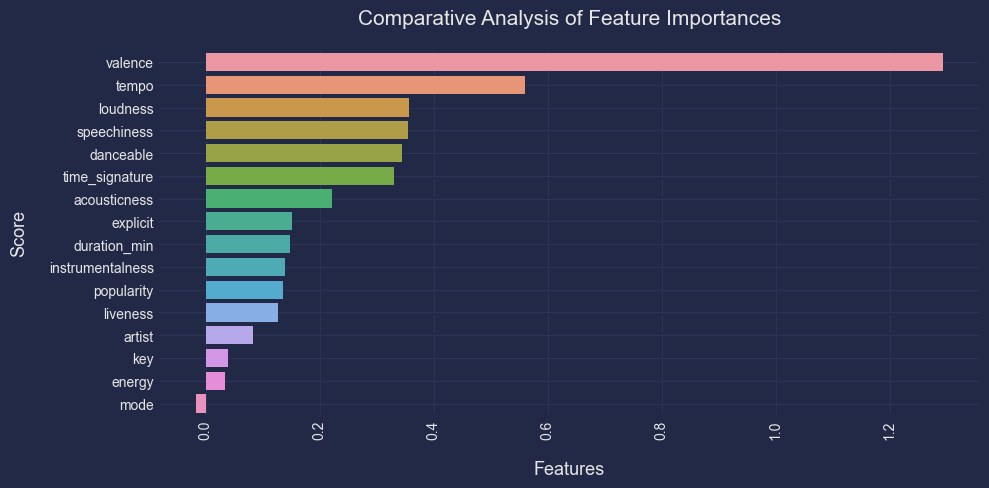

In [115]:
plt.figure(figsize=(10, 5))
ax=sns.barplot(data = feature_importances, y= "feature",x='votes', order= feature_importances.sort_values('votes', ascending=False)['feature'],orient ="h")
ax.set_title("Comparative Analysis of Feature Importances", fontsize=15,y=1.05)
ax.set_xlabel("Features", labelpad =15, fontsize=13)
ax.set_ylabel("Score", labelpad =15, fontsize=13)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.despine(left=True, bottom=True)
plt.tight_layout()
ax.grid(color='#2A3459')

plt.show()

In [110]:
meta_mask = votes>= 0  
X_reduced_r= X.loc[:,meta_mask] 
X_reduced_r.columns

Index(['popularity', 'explicit', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_min', 'artist', 'danceable'],
      dtype='object')

## Modeling and Evaluation 
we will apply different machine learning models to the data and evaluate their performance.

### Applying Regression Models
Let’s begin by applying regression models to predict our target variable, "danceability".

#### Data preparation
- We applied robust scaler to deal with outliers
- And Max Absolute to deal with loudness and tempo as their scale is greater than the other features scales

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced_r,y, random_state=42, test_size=0.2)

max_abs= MaxAbsScaler()

X_train= robust_scaler.fit_transform(X_train)
X_test= robust_scaler.transform(X_test)
indices = [4,10] # (loudness,Tempo)
X_train[:,indices] = max_abs.fit_transform(X_train[:,indices])
X_test[:,indices] = max_abs.transform(X_test[:,indices])


#### XGB Regressor

In [178]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb= xgb.predict(X_test)
r2_xgb= xgb.score(X_test,y_test)
mse_xgb= mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R-squared (R2): {r2_xgb}")

Mean Squared Error (MSE): 0.010320944607921732
R-squared (R2): 0.6654433339549539


#### Linear regression

In [72]:
lg= LinearRegression()
lg.fit(X_train,y_train)
y_pred_lg= lg.predict(X_test)
r2_lg= lg.score(X_test,y_test)
mse_lg= mean_squared_error(y_test, y_pred_lg)
print(f"Mean Squared Error (MSE): {mse_lg}")
print(f"R-squared (R2): {r2_lg}")

Mean Squared Error (MSE): 0.019740465638501535
R-squared (R2): 0.36010659672324963


#### Lasso

In [73]:
lcv= LassoCV(random_state=42)
lcv.fit(X_train,y_train)
y_pred_lcv= lcv.predict(X_test)
r2_lcv= lcv.score(X_test,y_test)
mse_lcv= mean_squared_error(y_test, y_pred_lcv)
print(f"Mean Squared Error (MSE): {mse_lcv}")
print(f"R-squared (R2): {r2_lcv}")


Mean Squared Error (MSE): 0.019736408424183626
R-squared (R2): 0.360238112601611


#### Ridge

In [74]:
rcv= RidgeCV()
rcv.fit(X_train,y_train)
y_pred_rcv= rcv.predict(X_test)
r2_rcv= rcv.score(X_test,y_test)
mse_rcv= mean_squared_error(y_test, y_pred_rcv)
print(f"Mean Squared Error (MSE): {mse_rcv}")
print(f"R-squared (R2): {r2_rcv}")

Mean Squared Error (MSE): 0.0197404507369284
R-squared (R2): 0.3601070797624303


#### Decision Tree regressor

In [75]:
dectr= DecisionTreeRegressor(random_state=42)
dectr.fit(X_train,y_train)
y_pred_dtr= dectr.predict(X_test)
r2_dtr= dectr.score(X_test,y_test)
mse_dtr= mean_squared_error(y_test, y_pred_dtr)
print(f"Mean Squared Error (MSE): {mse_dtr}")
print(f"R-squared (R2): {r2_dtr}")


Mean Squared Error (MSE): 0.02199236544743799
R-squared (R2): 0.28711055605396807


#### KNN

In [114]:
knn= KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn= knn.predict(X_test)
r2_knn= knn.score(X_test, y_test)
mse_knn= mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"R-squared (R2): {r2_knn}")

Mean Squared Error (MSE): 0.01694986148609033
R-squared (R2): 0.4505649081423


#### Ada Boost Regressor

In [77]:
adareg= AdaBoostRegressor(random_state=42)
adareg.fit(X_train,y_train)
y_pred_adareg= adareg.predict(X_test)
r2_adareg= adareg.score(X_test,y_test)
mse_adareg= mean_squared_error(y_test, y_pred_adareg)
print(f"Mean Squared Error (MSE): {mse_adareg}")
print(f"R-squared (R2): {r2_adareg}")

Mean Squared Error (MSE): 0.017675939660721687
R-squared (R2): 0.42702885571486104


#### Random Forest Regressor

In [78]:
randfr= RandomForestRegressor(random_state=42)
randfr.fit(X_train, y_train)
y_pred_rf= randfr.predict(X_test)
r2_rf= randfr.score(X_test,y_test)
mse_rf= mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2): {r2_rf}")

Mean Squared Error (MSE): 0.010566760291685752
R-squared (R2): 0.6574751412414157


### Hyperparameter Tuning for Regression model
we choose the XGBRegressor to tune their the hyperparameters using grid and randomize search cross-validation. and print the best parameters and the r2 score 

In [79]:
param_grid_xgb = {
    
    'max_depth': [5,10,15,20],
    'learning_rate': [0.05,0.1,0.15,0.2]
}
rfc= XGBRegressor(n_estimators=400)
grid_rfc = GridSearchCV(rfc, param_grid_xgb,refit=True,n_jobs=-1,cv=5,scoring='r2')
grid_rfc.fit(X_train, y_train)
print(f"Best Paramters (XGB): {grid_rfc.best_params_} , Best Score (XGB): {grid_rfc.best_score_}")

Best Paramters (XGB): {'learning_rate': 0.1, 'max_depth': 10} , Best Score (XGB): 0.6981859099230714


In [80]:
param_grid_xgb = {
    
    'gamma': [0,0.1,0.2,0.3],
    'reg_lambda': [0.5,1,1.5,2]
}
rfc= XGBRegressor(n_estimators=400, max_depth=10,learning_rate=0.1)
grid_rfc = GridSearchCV(rfc, param_grid_xgb,refit=True,n_jobs=-1,cv=5,scoring='r2')
grid_rfc.fit(X_train, y_train)
print(f"Best Paramters (XGB): {grid_rfc.best_params_} , Best Score (XGB): {grid_rfc.best_score_}")

Best Paramters (XGB): {'gamma': 0, 'reg_lambda': 1} , Best Score (XGB): 0.6981859099230714


In [81]:
param_grid_xgb = {
    'reg_alpha': [0.3,0.4,0.5,0.6,0.7]
}
rfc= XGBRegressor(n_estimators=400,max_depth=10, learning_rate=0.1,gamma= 0, reg_lambda= 2)
grid_rfc = GridSearchCV(rfc, param_grid_xgb,refit=True,n_jobs=-1,cv=5,scoring='r2')
grid_rfc.fit(X_train, y_train)
print(f"Best Paramters (XGB): {grid_rfc.best_params_} , Best Score (XGB): {grid_rfc.best_score_}")

Best Paramters (XGB): {'reg_alpha': 0.6} , Best Score (XGB): 0.7019497026723529


In [112]:
xgb_r=XGBRegressor(n_estimators=400,max_depth=10, learning_rate=0.1,gamma= 0, reg_lambda= 1,reg_alpha=0.6)
xgb_r.fit(X_train,y_train)
y_pred_xgb= xgb_r.predict(X_test)
r2_xgb= xgb_r.score(X_test,y_test)
mse_xgb= mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R-squared (R2): {r2_xgb}")

Mean Squared Error (MSE): 0.009118530484723168
R-squared (R2): 0.7044199659924932


## Applying Classification models
Let’s begin by applying classification models to predict our target variable, 

In [145]:
X = spotify.drop(['track_id','artists','album_name','track_name','track_genre'],axis=1)
y = spotify['danceable']
mask=['popularity', 'explicit', 'energy', 'key', 'loudness', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','time_signature', 'duration_min', 'artist',"danceability"]
X_reduced_c = X.loc[:,mask]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_reduced_c,y, random_state=42, test_size=0.2,stratify=y)
X_train= robust_scaler.fit_transform(X_train)
X_test= robust_scaler.transform(X_test)
max_abs= MaxAbsScaler()
indices = [4,10] # (loudness,Tempo)
X_train[:,indices] = max_abs.fit_transform(X_train[:,indices])
X_test[:,indices] = max_abs.transform(X_test[:,indices])

In [146]:

models = [
        ("NaiveBaise",GaussianNB()),
        ('Logistic', LogisticRegression(random_state=42)),
        ("XGB Classifier",XGBClassifier())
    ]



results = dict()


for name, model in models:
    print(name)
    model.fit(X_train_c, y_train_c)
    y_pred_c = model.predict(X_test_c)  
    accuracy = accuracy_score(y_test_c, y_pred_c)
    confusion_mat = confusion_matrix(y_test_c, y_pred_c)
    classification_rep = classification_report(y_test_c, y_pred_c)
    dance= pd.DataFrame(model.predict(X_reduced_c))
    dance = dance.rename(columns={0: "danceable"})
    dance= pd.concat([X_reduced_c,dance],axis=1)
    index= dance[(dance['danceable']==1)&(dance['popularity']>49)&(dance['energy']>=0.68)&(dance['valence']>=0.55)].sort_values(by="danceability",ascending=False)[:50].index
    
    results[name] = [accuracy,confusion_mat,classification_rep,dance,index]


NaiveBaise
Logistic
XGB Classifier


In [147]:
for model in results:
    print(model,"Has accuracy",results[model][0])

NaiveBaise Has accuracy 0.9256426120704202
Logistic Has accuracy 0.9602339839136059
XGB Classifier Has accuracy 1.0


## Reccomendation

## This is the output of our Classification model XGB Regressor

In [131]:
dance= pd.DataFrame(xgb_r.predict(X_reduced_r))
dance = dance.rename(columns={0: "danceability"})
dance= pd.concat([X_reduced_r,dance],axis=1)
dance.head()
index= dance[(dance['popularity']>=55)&(dance['energy']>=0.68)&(dance['valence']>=0.55)].sort_values(by='danceability',ascending=False)[:50].index
playlist= spotify.loc[index].sort_values(by='danceability',ascending=False)
playlist


,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,artist,danceable,modeText
67281,4ZlHgEGwZb3PCq0OWFbhcO,Ozuna,OzuTochi,Kotodama,63,False,0.884,0.694,0,-3.241,1,0.0716,0.156000,0.018800,0.3000,0.597,93.025,4,latin,3.142217,20664,1,Major
66769,228BxWXUYQPJrJYHDLOHkj,Daddy Yankee,Barrio Fino (Bonus Track Version),Gasolina,82,False,0.852,0.797,0,-6.543,1,0.0614,0.322000,0.000003,0.0845,0.741,96.008,4,latin,3.210000,6470,1,Major
80648,0X7g825ekNNiCWWV7queDr,Kaka,Mitti De Tibbe,Mitti De Tibbe,67,False,0.849,0.853,6,-3.400,0,0.1590,0.355000,0.000000,0.0896,0.794,129.966,4,pop,4.554183,14266,1,Minor
23535,01fVbxyW9y2oKdXvg56uE5,Dombresky,Soul Sacrifice,Soul Sacrifice,58,False,0.847,0.934,9,-5.381,1,0.0442,0.007830,0.494000,0.0797,0.863,126.035,4,deep-house,3.870183,7718,1,Major
1091,1q8NdCAQ9QUjpYiqzdd3mv,Calle 13,Calle 13 (Explicit Version),Atrévete-Te-Te,75,True,0.829,0.878,9,-5.951,1,0.1010,0.095900,0.000000,0.7760,0.883,87.991,4,afrobeat,3.988433,4471,1,Major
54726,5FihcmME7NlwW8KbYOaHVH,Pritam;Arijit Singh;Badshah;Jonita Gandhi;Naka...,Ae Dil Hai Mushkil (Original Motion Picture So...,The Breakup Song,60,False,0.818,0.930,11,-2.982,1,0.2470,0.330000,0.000000,0.6580,0.831,113.988,4,indian,4.210517,21778,1,Major
54634,4Xba44w0LihzNJj1xgjs8J,Pritam;Yo Yo Honey Singh;Armaan Malik;Shashwat...,"De Taali (From ""Bhool Bhulaiyaa 2"")","De Taali (From ""Bhool Bhulaiyaa 2"")",67,False,0.818,0.899,1,-3.667,1,0.1170,0.157000,0.000000,0.0725,0.736,120.016,4,indian,3.502717,21918,1,Major
79751,6VbmeIWTbNHM5uqoW7GTE4,Sunidhi Chauhan;Vishal Dadlani,Tees Maar Khan,Sheila Ki Jawani,63,False,0.803,0.859,6,-4.405,0,0.1850,0.305000,0.000062,0.5530,0.631,101.007,4,pop-film,4.695117,26093,1,Minor
79967,7Hkbm2DgepcriVxDrwbCcc,Mohammed Rafi;Sanam,Sanam - Taarif Karoon,Taarif Karoon,58,False,0.796,0.681,5,-6.067,1,0.0464,0.352000,0.000000,0.1050,0.795,111.995,4,pop-film,2.629333,18848,1,Major
47998,5czjjnbTatyFal33a9h1aN,Rakim,The 18th Letter / The Book Of Life,Guess Who's Back,59,False,0.796,0.798,6,-7.456,0,0.2620,0.015300,0.000000,0.1060,0.692,94.016,4,hardcore,4.181767,22373,1,Minor


## This is the output of our Classification model XGB Classifier

In [153]:
spotify.loc[results["XGB Classifier"][4]]

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,artist,danceable,modeText
14504,4UUMA9msejPgKPn2vHFI0G,Pinkfong,Pinkfong Animal Songs,The Penguin Dance,53,False,0.947,0.959,1,-3.158,1,0.3220,0.20500,0.000000,0.0414,0.867,130.019,4,children,1.824217,21453,1,Major
88084,6wwT3PgG3eFuKCpxzjMJFs,Becky G;Burna Boy,Rotate,Rotate,60,False,0.910,0.856,11,-2.082,0,0.1570,0.03460,0.000223,0.0624,0.771,109.029,4,reggae,3.365667,3175,1,Minor
48098,6uzesxG4dlBg3faZmzL6Qs,Obie Trice,Cheers,The Setup,61,True,0.908,0.738,1,-4.933,1,0.2710,0.14300,0.000000,0.0829,0.790,95.954,4,hardcore,3.216667,20230,1,Major
47841,1pOIpxfrQ8AszXZdKR3aH3,N.W.A.,Straight Outta Compton,Gangsta Gangsta,64,True,0.894,0.698,6,-8.264,0,0.2750,0.02790,0.000004,0.3290,0.695,98.104,4,hardcore,5.615283,19242,1,Minor
67281,4ZlHgEGwZb3PCq0OWFbhcO,Ozuna,OzuTochi,Kotodama,63,False,0.884,0.694,0,-3.241,1,0.0716,0.15600,0.018800,0.3000,0.597,93.025,4,latin,3.142217,20664,1,Major
66867,2aI21FnmY7TJVKeMaoQZ0t,Nelly Furtado,Loose,Say It Right,79,False,0.872,0.872,1,-6.328,1,0.1390,0.04760,0.001120,0.0543,0.809,116.948,4,latin,3.718000,19636,1,Major
19795,7JJmb5XwzOO8jgpou264Ml,Shawn Mendes,Illuminate (Deluxe),There's Nothing Holdin' Me Back,86,False,0.866,0.813,11,-4.063,0,0.0554,0.38000,0.000000,0.0779,0.969,121.998,4,dance,3.324000,24779,1,Minor
54929,3WqPXSsDs2yy4NI2ncn6PS,Manikka Vinayagam;Sumangali,Thiruppatchi (Original Motion Picture Soundtrack),Kattu Kattu,51,False,0.863,0.746,9,-8.987,0,0.1860,0.33900,0.001050,0.1940,0.840,141.913,4,indian,5.203100,17301,1,Minor
66769,228BxWXUYQPJrJYHDLOHkj,Daddy Yankee,Barrio Fino (Bonus Track Version),Gasolina,82,False,0.852,0.797,0,-6.543,1,0.0614,0.32200,0.000003,0.0845,0.741,96.008,4,latin,3.210000,6470,1,Major
80648,0X7g825ekNNiCWWV7queDr,Kaka,Mitti De Tibbe,Mitti De Tibbe,67,False,0.849,0.853,6,-3.400,0,0.1590,0.35500,0.000000,0.0896,0.794,129.966,4,pop,4.554183,14266,1,Minor


## Or we can get the top 50 from mashing up all the classification models out put 

In [155]:
default50 = spotify[(spotify['danceable']==1)&(spotify['popularity']>49)&(spotify['energy']>=0.68)&(spotify['valence']>=0.55)].sort_values(by="danceability",ascending=False).head(50).index.tolist()
songsset=set()
for model in results:
## Counter for the songs that may exist in the top 50 based on our filter that was based on our analysis
    Songs_exists=0 

    for inde in results[model][4]:
        songsset.add(inde)
print(len(songsset))
playlist= spotify.loc[list(songsset)]
playlist.sort_values(by="danceability",ascending=False).head(50)

102


,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,artist,danceable,modeText
14504,4UUMA9msejPgKPn2vHFI0G,Pinkfong,Pinkfong Animal Songs,The Penguin Dance,53,False,0.947,0.959,1,-3.158,1,0.3220,0.20500,0.000000,0.0414,0.867,130.019,4,children,1.824217,21453,1,Major
88084,6wwT3PgG3eFuKCpxzjMJFs,Becky G;Burna Boy,Rotate,Rotate,60,False,0.910,0.856,11,-2.082,0,0.1570,0.03460,0.000223,0.0624,0.771,109.029,4,reggae,3.365667,3175,1,Minor
48098,6uzesxG4dlBg3faZmzL6Qs,Obie Trice,Cheers,The Setup,61,True,0.908,0.738,1,-4.933,1,0.2710,0.14300,0.000000,0.0829,0.790,95.954,4,hardcore,3.216667,20230,1,Major
47849,1YQ7BbJR8HqAolfprvxGKu,The Notorious B.I.G.;Lil' Kim;Diddy,Born Again,Notorious B.I.G. (feat. Lil' Kim & Puff Daddy)...,60,True,0.904,0.826,1,-2.372,0,0.2720,0.05310,0.000000,0.2140,0.824,101.350,4,hardcore,3.193333,27293,1,Minor
21630,5MAScTGPHzWAeivPjpATa9,Patoranking;Wande Coal,"My Woman, My Everything (feat. Wandecoal) - Si...","My Woman, My Everything (feat. Wandecoal)",53,False,0.902,0.845,11,-2.695,1,0.0644,0.04380,0.000000,0.0867,0.625,112.005,4,dancehall,3.895283,20983,1,Major
65582,6gwhF3t8taMbjpklXAgwMN,Koo Koo Kanga Roo,"Cafetorium Songs, Vol. 1",Pop See Ko,50,False,0.901,0.760,11,-12.316,0,0.8400,0.29800,0.000000,0.9660,0.638,134.021,4,kids,2.314000,14913,1,Minor
33378,4FKLSypcBIVAwM2cyU0rjK,Lil Pump,I'm Back,I'm Back,51,True,0.898,0.773,10,-5.588,0,0.0423,0.04190,0.000000,0.1070,0.600,140.031,4,emo,2.077600,15856,1,Minor
21621,47MwPx7nbFUD5IGVhL38Zr,Skillibeng;F.S.,Whap Whap (feat. F.S.),Whap Whap (feat. F.S.),58,False,0.895,0.780,6,-6.458,0,0.2320,0.20700,0.000098,0.1180,0.590,106.988,4,dancehall,3.018583,25129,1,Minor
47901,3zZ2THLkGS76yPbOEHFKMR,Eazy-E,Impact of A Legend,Switchez,59,True,0.895,0.874,4,-1.906,0,0.1940,0.01720,0.000006,0.1020,0.701,93.019,4,hardcore,4.490883,8210,1,Minor
47841,1pOIpxfrQ8AszXZdKR3aH3,N.W.A.,Straight Outta Compton,Gangsta Gangsta,64,True,0.894,0.698,6,-8.264,0,0.2750,0.02790,0.000004,0.3290,0.695,98.104,4,hardcore,5.615283,19242,1,Minor


# Conclusion
After our deep Analysis, adding new feature "Danceable" that was based on our analysis and filter , and last but not least trying 2 different approaches to satisfy our company's party attendees we can say that the mash up between the  classification models is better than using XGB classifier or the XGB regressor output by themselves, and this fulfills our challenge which was curating an ultimate dance party playlist of the top 50 songs according to our model prediction, and also we can still use the top 50 that was based on our analysis as they also satisfy our goal.